# TP1 - EJ4 - Agrupamiento(Clustering)

## Integrantes:


● Mejia Alan Roberto - 91161 \
● Prieto Pablo Alejandro - 91561 \
● Sosa Zoraida Flores - 87039

## Objetivos

El objetivo de este ejercicio es buscar los posibles agrupamientos de los datos en funcion de algun criterio.

Los datos a utilizar contiene informacion de algunas tracks(canciones) de Spotify.

# Importaciones

## Instalaciones

In [145]:
#

## Bibliotecas

In [146]:
#Librerías para manejo de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.preprocessing import scale, MinMaxScaler

Bibliotecas con modelos

In [147]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

## Datasets

In [148]:
df = pd.read_csv('playlist_spotify.csv')


# Analisis exploratorio

En esta seccion se realiza un analisis necesario para comprender el dominio del problema.

## Forma del dataset

In [149]:
df.shape

(750, 13)

In [150]:
(registros, variables) = df.shape
print("Cantidad de registros: " + str(registros))
print("Cantidad de variables: " + str(variables))

Cantidad de registros: 750
Cantidad de variables: 13


## Variables

In [151]:
variables = df.columns.to_list()
variables

['acousticness',
 'danceability',
 'duration',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

## Datos nulos

In [152]:
(df.isnull().sum() / len(df)) * 100

acousticness        0.0
danceability        0.0
duration            0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
speechiness         0.0
tempo               0.0
time_signature      0.0
valence             0.0
dtype: float64

Observaciones: No existen datos nulos

## Tipos de datos de las variables del dataset

In [153]:
tipos = df.dtypes
print(tipos)

acousticness        float64
danceability        float64
duration              int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object


## Inspeccion de registros

In [154]:
df.head()

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.713         0.514    100125   0.521          0.816000    8   
1         0.192         0.714    207019   0.614          0.000000    4   
2         0.333         0.630    216200   0.455          0.000004    5   
3         0.601         0.810    136413   0.221          0.210000    5   
4         0.883         0.465    181440   0.459          0.000173    6   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.1120   -14.835     0       0.0444  119.879               4    0.143  
1    0.2630    -6.935     1       0.0319  123.969               4    0.582  
2    0.1270    -9.290     1       0.0292  139.931               4    0.199  
3    0.1840   -11.005     1       0.0429  109.960               4    0.798  
4    0.0692    -8.137     0       0.0351   90.807               4    0.288

In [155]:
df.tail()

acousticness  danceability  duration  energy  instrumentalness  key  \
745      0.000175         0.374    333827   0.943          0.000156    6   
746      0.001970         0.487    213000   0.867          0.006020   10   
747      0.916000         0.605    125867   0.314          0.000000    0   
748      0.168000         0.700    249493   0.823          0.000028    3   
749      0.015500         0.477    276720   0.776          0.003140    1   

     liveness  loudness  mode  speechiness    tempo  time_signature  valence  
745    0.1250    -4.108     0       0.0556  112.084               4    0.338  
746    0.0968    -3.293     0       0.0543  160.048               4    0.403  
747    0.3590    -7.631     1       0.0327  138.148               4    0.836  
748    0.1220    -6.892     1       0.0373  144.060               4    0.745  
749    0.2030    -5.056     1       0.0349  131.004               4    0.429

## Lista variables categoricas

In [156]:
variables_categoricas = []

## Lista variables Numericas

In [157]:
variables_numericas = [variable for variable in variables if variable not in variables_categoricas]
variables_numericas

['acousticness',
 'danceability',
 'duration',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

## Estadisticos de variables numericas

In [158]:
df.describe()

acousticness  danceability       duration      energy  \
count    750.000000    750.000000     750.000000  750.000000   
mean       0.357394      0.596439  220112.733333    0.594188   
std        0.338405      0.172036   65587.690483    0.253301   
min        0.000001      0.107000   33840.000000    0.009250   
25%        0.037150      0.480000  185490.250000    0.423250   
50%        0.244500      0.606000  215108.500000    0.631500   
75%        0.678500      0.715750  244236.750000    0.804750   
max        0.994000      0.986000  675360.000000    0.995000   

       instrumentalness         key    liveness    loudness        mode  \
count        750.000000  750.000000  750.000000  750.000000  750.000000   
mean           0.100245    4.829333    0.203376   -8.509339    0.741333   
std            0.259921    3.636001    0.177609    5.039488    0.438194   
min            0.000000    0.000000    0.024000  -29.601000    0.000000   
25%            0.000000    1.000000    0.094550  -10.173500    0.000000   
50%            0.000010    5.000000    0.129000   -7.270000    1.000000   
75%            0.002245    8.000000    0.264750   -5.097750    1.000000   
max            0.967000   11.000000    0.979000   -0.533000    1.000000   

       speechiness       tempo  time_signature     valence  
count   750.000000  750.000000      750.000000  750.000000  
mean      0.098966  120.405761        3.902667    0.497321  
std       0.104715   28.378116        0.400091    0.239615  
min       0.023400   55.747000        1.000000    0.033200  
25%       0.035900   98.998000        4.000000    0.297000  
50%       0.048750  120.104500        4.000000    0.483000  
75%       0.113000  138.074750        4.000000    0.684500  
max       0.721000  204.162000        5.000000    0.975000

## Cantidad de Nulos

In [159]:
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

No existen datos nulos. Es un dataset limpios de ellos.

## Transformacion del dataset

In [160]:
df_filtrado = df.drop(['key', 'mode', 'time_signature'], axis=1)


In [161]:
df_filtrado.head()

acousticness  danceability  duration  energy  instrumentalness  liveness  \
0         0.713         0.514    100125   0.521          0.816000    0.1120   
1         0.192         0.714    207019   0.614          0.000000    0.2630   
2         0.333         0.630    216200   0.455          0.000004    0.1270   
3         0.601         0.810    136413   0.221          0.210000    0.1840   
4         0.883         0.465    181440   0.459          0.000173    0.0692   

   loudness  speechiness    tempo  valence  
0   -14.835       0.0444  119.879    0.143  
1    -6.935       0.0319  123.969    0.582  
2    -9.290       0.0292  139.931    0.199  
3   -11.005       0.0429  109.960    0.798  
4    -8.137       0.0351   90.807    0.288

In [162]:
df.columns.to_list()


['acousticness',
 'danceability',
 'duration',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

## Analisis de correlacion



In [163]:
matriz_correlacion = df_filtrado.corr(numeric_only=True)

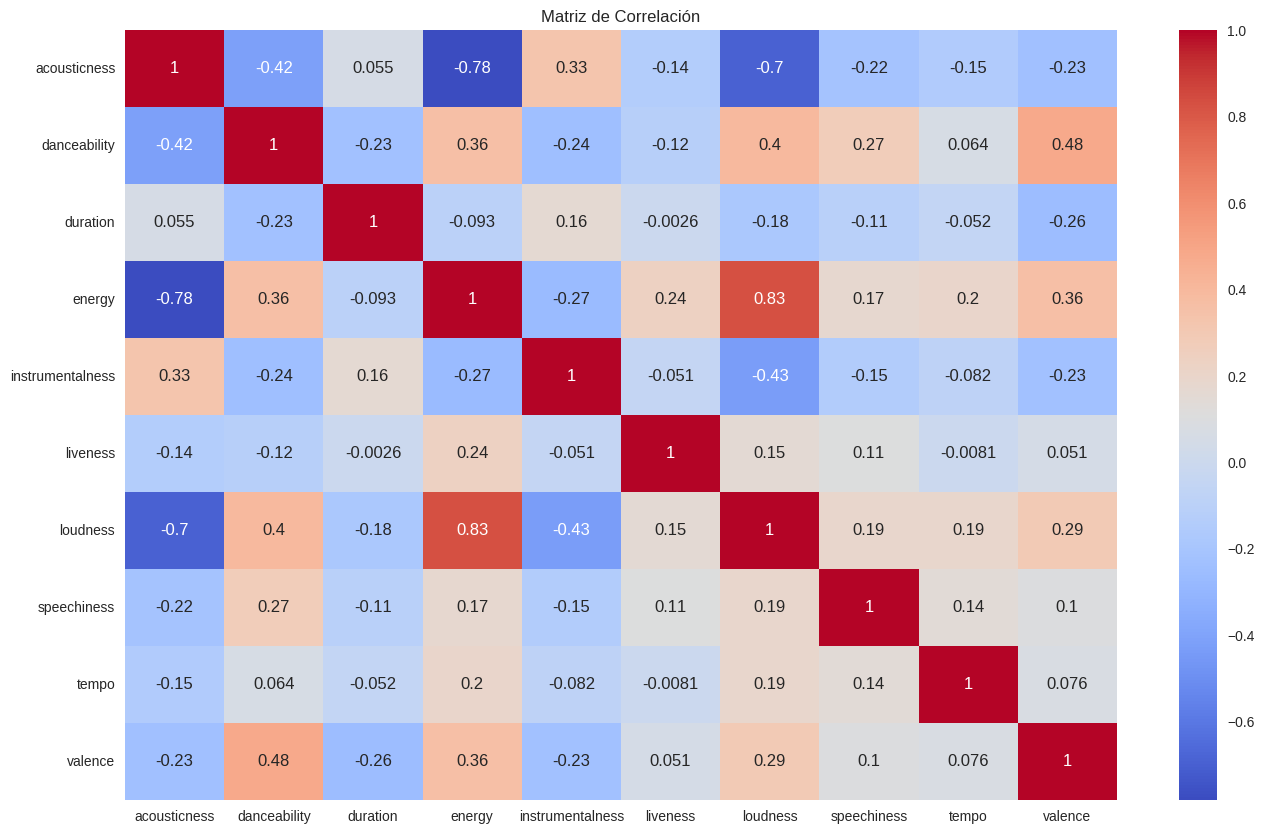

In [164]:
plt.figure(figsize=(16, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observaciones:
* Se observa fuertes correlaciones con los features:
  * energy vs acousticness (inversa)
  * loudness vs acousticness (inversa)
  * loudness vs energy (directa)
  * danceability vs valence (directa)

Estas observaciones nos dan idea de como podrian estar agrupados en clusters nuestro dataset. O sea tener presentas las posibles fuerzas de armado de clusters.

# Entrenamiento y Agrupamiento

## Preprocesamiento

El tema de las distancia es importante para hacer analisis y calculos de clusterinzacion, por que se pasa a escalar las variables. Realizando esto se evita que una variable domine por sobre otra por un tema de distancias dadas por sus escalas originales. La escala no deberia ser relevante, sino la informacion que hay detras.

Se crea el objeto escalado de minimo y maximo.

In [165]:
scaler = MinMaxScaler(feature_range=(0,1))

Se escala el dataframe

In [166]:
df_filtrado_escalado = scaler.fit_transform(df_filtrado)

## Tendencia al clustering - Hopkins

Antes de realizar clustering es deseable analizar si es conveniente o no realizar dicha opareacion.
Para ello se analiza previamente la tendencia a clustering del dataset.
Una de las formas que tenemos para evaluarlo es mediante la estadistica de Hopkins. Esta estadistica prueba la aleatoriedad espacial de los datos.

* Un valor de Hopkins cercano a 1 (por ejemplo, 0.9) sugiere que los datos están estructurados y probablemente sean adecuados para la agrupación en clústeres.

* Un valor de Hopkins cercano a 0 indica que los datos están distribuidos aleatoriamente y no son adecuados para la agrupación.

* Normalmente, un valor por encima de 0.5 indica la presencia de clústeres, mientras que valores por debajo de 0.5 indican aleatoriedad.

Implementacion propia de la estadisitica de Hopkins

In [167]:
from sklearn.neighbors import NearestNeighbors
import random

In [168]:
def Hopkins(datos,*args):
    n = datos.shape[0] # filas
    d = datos.shape[1] # columnas

    if not args:
        m = int(0.1 * n) # cantidad de puntos al azar (default)
        print("Numero de puntos al azar por defecto",m)
    else:
        m = args[0] # cantidad de puntos al azar

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(datos) # buscador de vecinos
    #random.seed(42)
    rand_ind = random.sample(range(0, n, 1), m) # indices al azar

    ui = []
    wi = []
    for j in range(0, m):

        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos

        ui.append(u_dist[0][1])

        w_dist, _ = nbrs.kneighbors(datos[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
        #w_dist, _ = nbrs.kneighbors(datos.iloc[rand_ind[j]].values.reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar si df es un dataframe

        wi.append(w_dist[0][1])


    H = sum(ui) / (sum(ui) + sum(wi))
    return H

Calculo de la estadistica de Hopkins

In [169]:
Hopkins(df_filtrado_escalado)

Numero de puntos al azar por defecto 75


0.925312960440575

Se observa que el valor de la estadistica de Hopkins sugiere que los datos están estructurados y son adecuados para la agrupación en clústeres.

## Estimacion de cantidad de grupos de clustering - Metodo de Elbow

El __método de Elbow__ consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varias cantidades de clusters y verificar cual es el que brinda un mejor agrupamiento

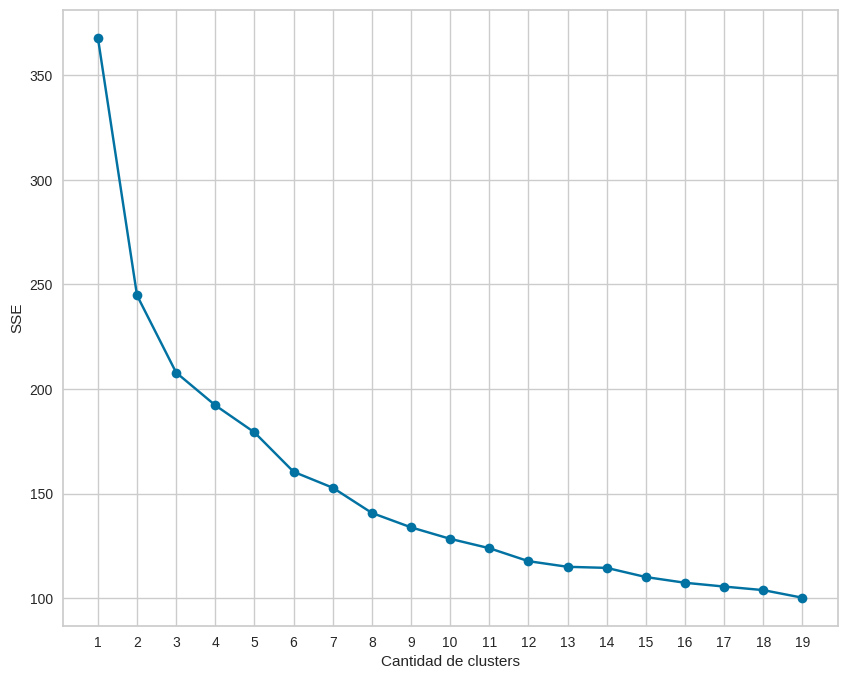

In [170]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_filtrado_escalado)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(10, 8))
plt.xticks(np.arange(0, 21, 1))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

El ultimo mayor variacion en la suma del error cuadrado se da a partir de n = 4. Aun asi, no esta del todo definido. Para ellos se debera hacer otro tipo de analsis adicional.

## Calidad de candtidad de grupos - Silhouette

El Índice de Silueta indica si existen o no estructuras en los datos.

Analizamos los grupos desde n=4 hasta los n=10, que son las cantidad de grupos que visualmente cumpliriran con el metodo de elbow.

In [171]:
from sklearn.metrics import silhouette_score

In [172]:
list_k = list(range(2, 10))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_filtrado_escalado)

    score = silhouette_score (df_filtrado_escalado, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.3305299401200363
For n_clusters =3 silhouette score is 0.29032228351888434
For n_clusters =4 silhouette score is 0.3007394658595982
For n_clusters =5 silhouette score is 0.17378167975206163
For n_clusters =6 silhouette score is 0.17707378366402243
For n_clusters =7 silhouette score is 0.15979101020661393
For n_clusters =8 silhouette score is 0.1773549102500136
For n_clusters =9 silhouette score is 0.1671445865384067


Analizando visualmente

In [173]:
from yellowbrick.cluster import SilhouetteVisualizer

Los valores de mayor indice de silhouette son para los clusters de 2 y 3.

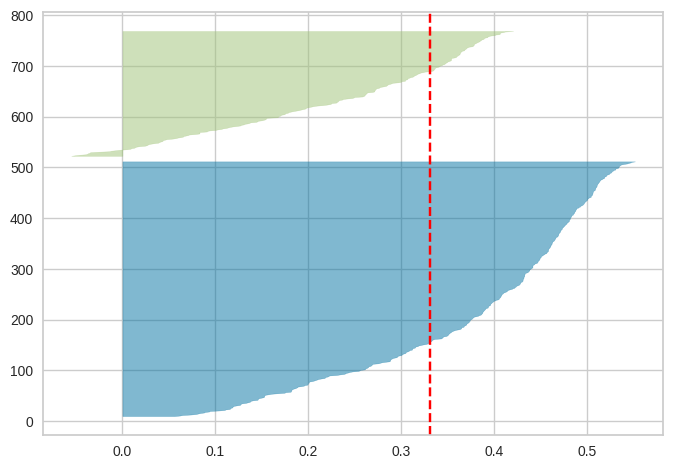

In [174]:
model = KMeans(2, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df_filtrado_escalado)
plt.show()

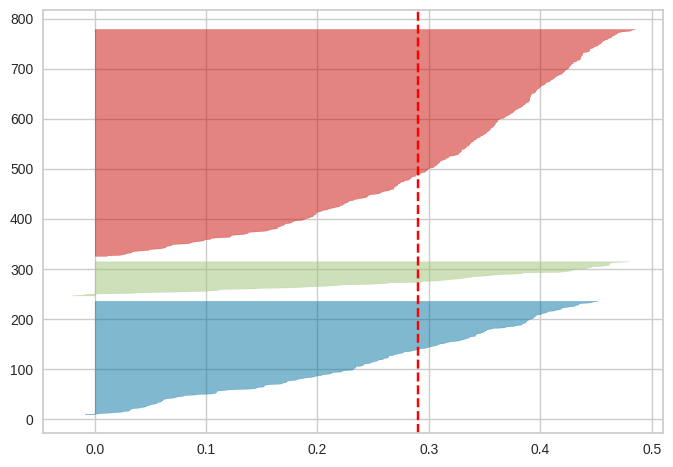

In [175]:
model = KMeans(3, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df_filtrado_escalado)
plt.show()

Observaciones:

* Dado que en los graficos de de Silhouette muestran menos outliers para k=3, elegimos este numero de clusters.

## Analisis de cada grupo

## Ubicacion de los centroides

In [179]:
df_filtrado_escalado = pd.DataFrame(df_filtrado_escalado, columns=df_filtrado.columns)

In [180]:
centroids = pd.DataFrame(model.cluster_centers_, columns=df_filtrado.columns.to_list())
print(centroids)

   acousticness  danceability  duration    energy  instrumentalness  liveness  \
0      0.679703      0.461813  0.278868  0.383298          0.011365  0.182007   
1      0.868999      0.410117  0.351764  0.233179          0.800084  0.099100   
2      0.122047      0.626608  0.286776  0.753188          0.043973  0.204224   

   loudness  speechiness     tempo   valence  
0  0.643483     0.073418  0.407889  0.403613  
1  0.416748     0.034373  0.374835  0.330306  
2  0.813594     0.137015  0.458793  0.562094  


## Exploración Visual de los Clusters

In [181]:
df_filtrado_escalado['cluster'] = model.labels_

### Pairplot (gráficas de pares)

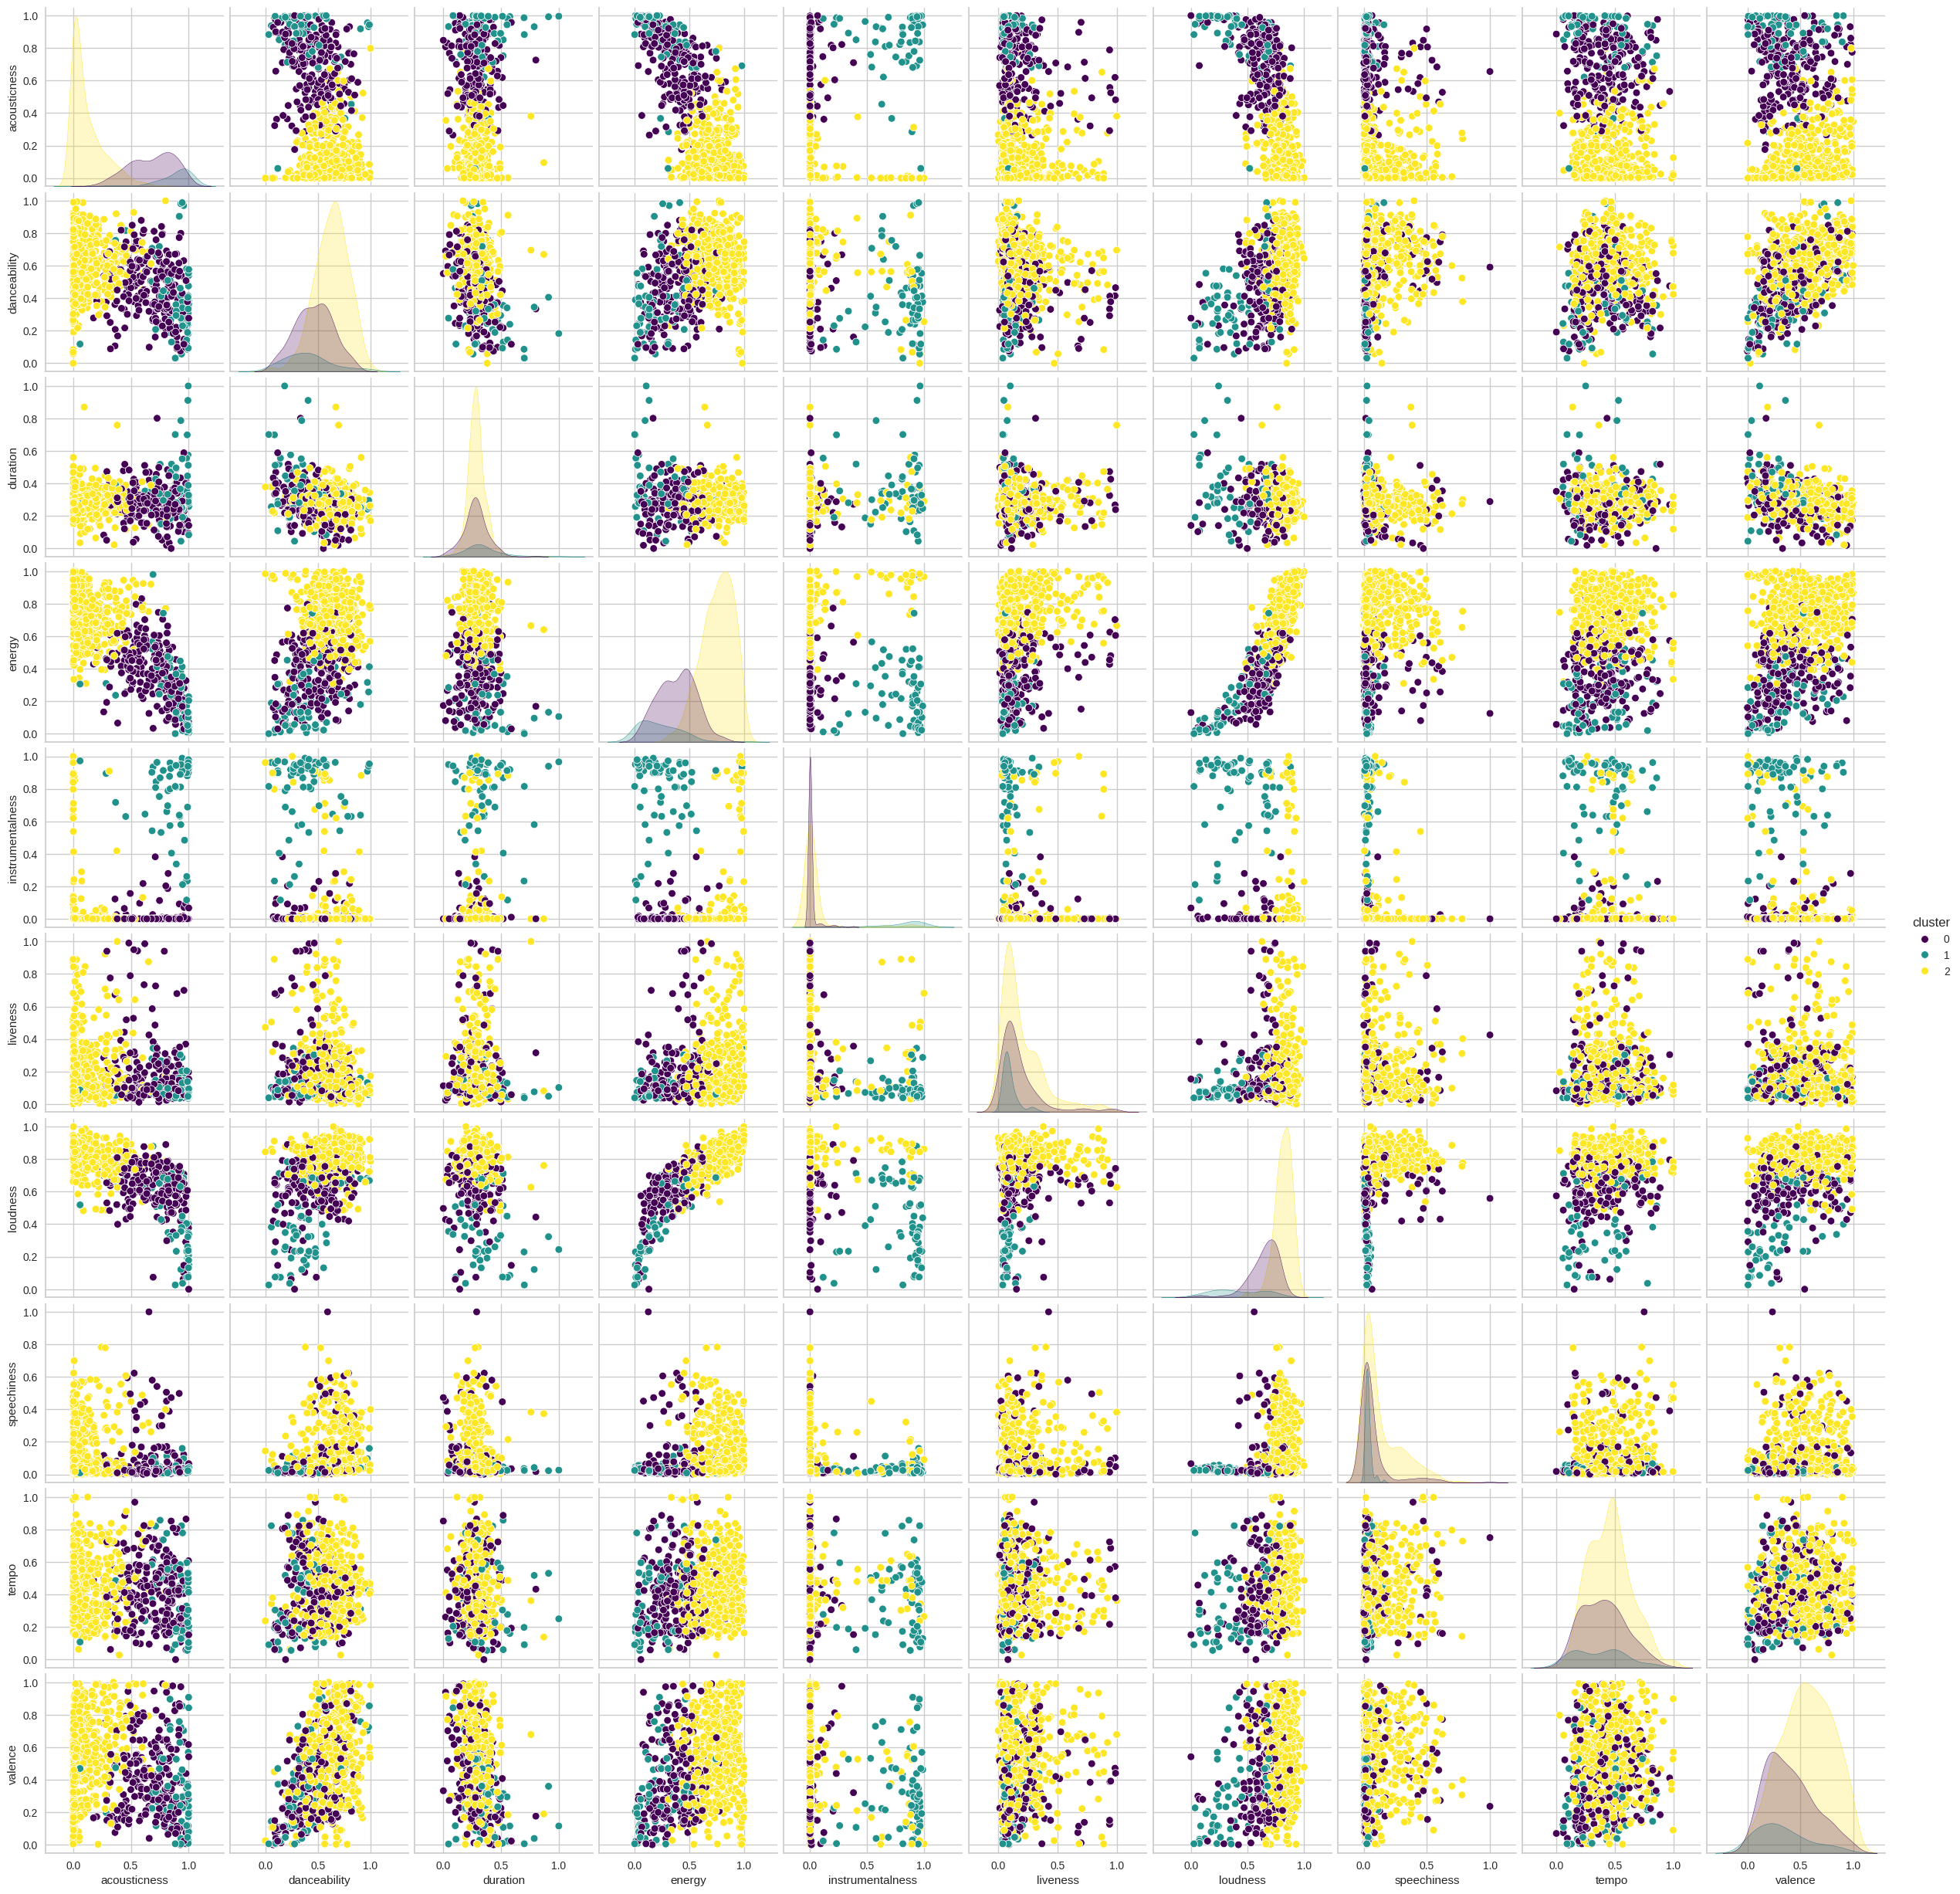

In [182]:
sns.pairplot(df_filtrado_escalado, hue='cluster', palette='viridis')
plt.show()

### Análisis de Características por Cluster

Para poder identificar mejor los clusters identificamos los centroides de los clusters.

In [183]:
# Promedio de cada característica por cluster
cluster_summary = df_filtrado_escalado.groupby('cluster').mean()
print(cluster_summary)

         acousticness  danceability  duration    energy  instrumentalness  \
cluster                                                                     
0            0.679703      0.461813  0.278868  0.383298          0.011365   
1            0.868999      0.410117  0.351764  0.233179          0.800084   
2            0.122047      0.626608  0.286776  0.753188          0.043973   

         liveness  loudness  speechiness     tempo   valence  
cluster                                                       
0        0.182007  0.643483     0.073418  0.407889  0.403613  
1        0.099100  0.416748     0.034373  0.374835  0.330306  
2        0.204224  0.813594     0.137015  0.458793  0.562094  


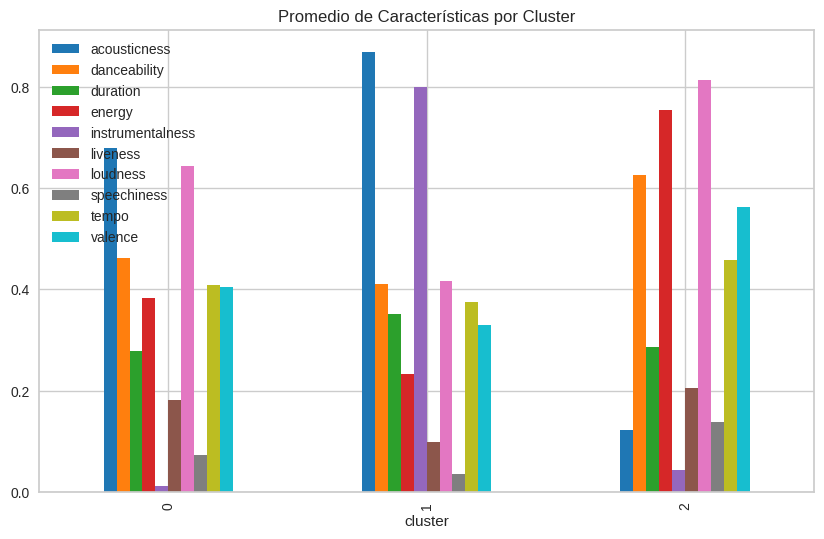

In [189]:
colors = sns.color_palette("tab10", 10)
# cluster_summary.plot(kind='bar', figsize=(10, 6), title='Promedio de Características por Cluster')
cluster_summary.plot(kind='bar', figsize=(10, 6), title='Promedio de Características por Cluster', color=colors)

plt.show()

### Análisis de Importancia de Características por Random Forest

Para explorar qué características son más importantes en la clasificación de los clusters, usamos un modelo de Random Forest para identificar las variables que tienen más peso en la asignación de los clusters:

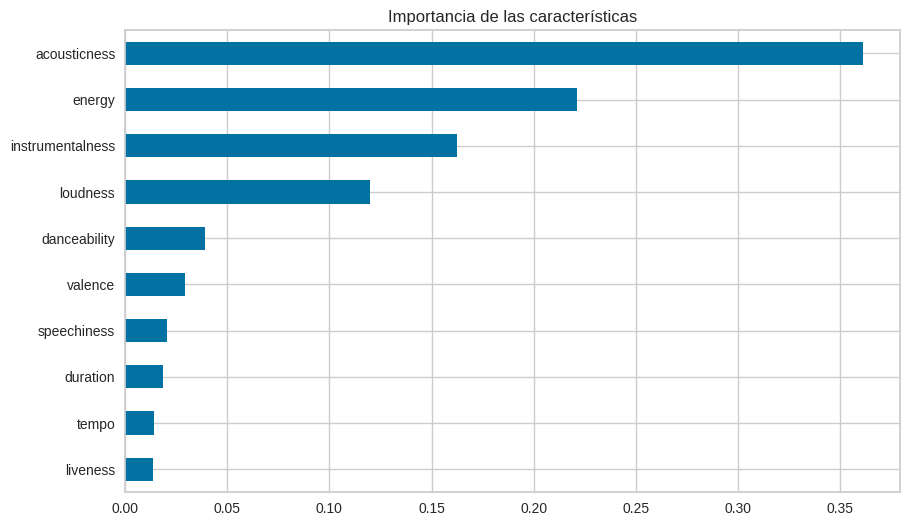

In [188]:
from sklearn.ensemble import RandomForestClassifier

# Modelo de Random Forest para clasificar los clusters
rf = RandomForestClassifier()
rf.fit(df_filtrado_escalado.drop('cluster', axis=1), df_filtrado_escalado['cluster'])

# Importancia de características
importances = pd.Series(rf.feature_importances_, index=df_filtrado_escalado.columns[:-1])
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Importancia de las características')
plt.show()


# Conclusiones

* Las fuerzas obtenidas por el analisis de correlacion fueron las que terminaron definiendo los clusters.
* Se observaron 3 clusters con las siguientes caracteristicas:
  1. k1: cluster marcado por loudness y acousticness. Suponemos que son personas que les gusta escuchar musica de forma intensa y con pasion.
  2. k2: cluster marcado por instrumentalness y acousticness. Suponemos que son personas que buscan musica para relajarse o quizas enfocarse mientras hacen alguna tarea.
  3. k3: cluster marcado por loudess, energy y danceability. Suponemos que esun grupo de personas que buscan musica para bailar.